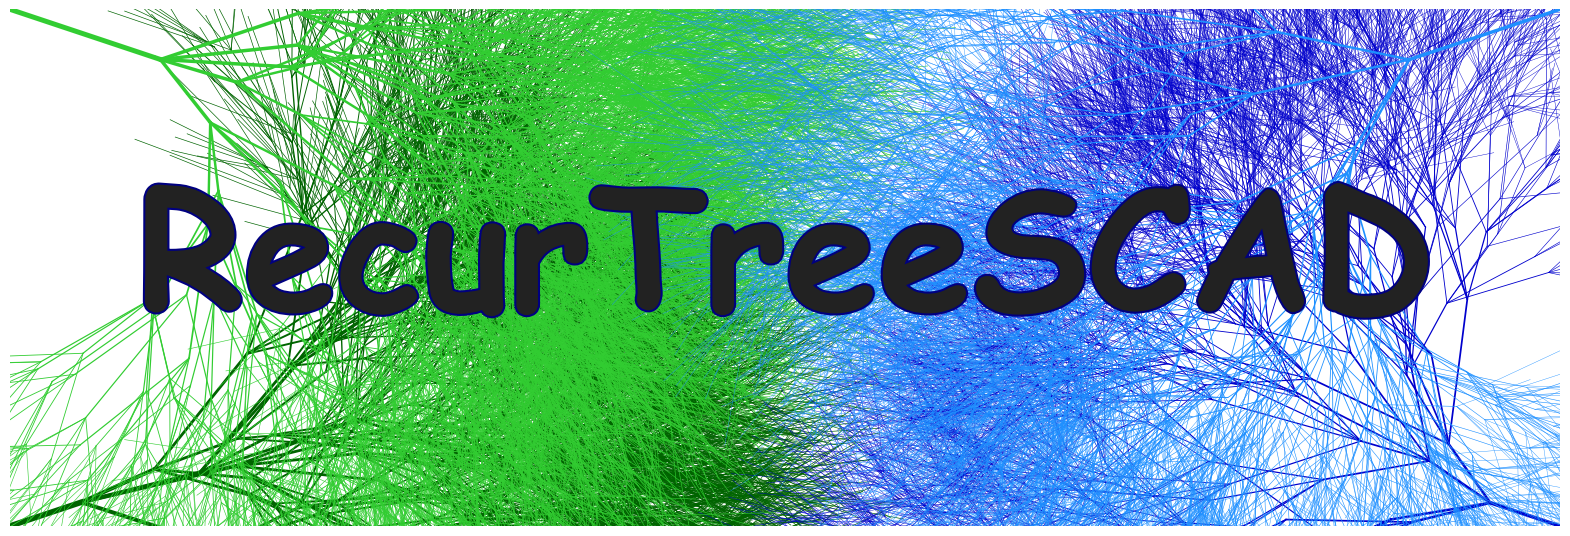

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import matplotlib.colors as mcolors
from matplotlib import patheffects

def draw_branch(ax, start_point, angle, depth, width, n_branch_min, n_branch_max, color):
    """Recursively draw branching lines."""
    if depth == 0:
        return
    length = np.random.uniform(2, 5)  # Randomize branch length
    end_point = (start_point[0] + length * np.cos(angle), start_point[1] + length * np.sin(angle))

    ax.plot([start_point[0], end_point[0]], [start_point[1], end_point[1]], color=color, linewidth=width)

    # Recursion for branching
    new_angle_range = (-np.pi / 4, np.pi / 4)  # Angle range for new branches
    for _ in range(np.random.randint(n_branch_min, n_branch_max)):  # Randomize the number of new branches
        new_angle = angle + np.random.uniform(new_angle_range[0], new_angle_range[1])
        draw_branch(ax, end_point, new_angle, depth - 1, width * 0.7, n_branch_min, n_branch_max, color)  # Recursive call

def plot_branches_from_corners(ax, depth, width_range, n_branch_min, n_branch_max):
    """
    Start branches from each corner of the plot area with specified colors.
    """
    corners = [(0, 0), (cols * 2, 0), (0, rows), (cols * 2, rows)]  # Define the corners
    colors = ["#006400", "#0000CD", "#32CD32", "#1E90FF"]  # DarkGreen, MediumBlue, LimeGreen, DodgerBlue
    for corner, color in zip(corners, colors):
        angle = np.arctan2(rows / 2 - corner[1], cols - corner[0])  # Calculate initial angle towards the center
        draw_branch(ax, corner, angle, depth, np.random.uniform(width_range[0], width_range[1]), n_branch_min, n_branch_max, color)

# Parameters
frame_edge_width = 4
cols = 24
rows = 16
branch_depth = 7
n_branch_min = 3
n_branch_max = 6
width_range = (2, 5)  # Width range for the branches
exclusion_zone = (frame_edge_width, frame_edge_width, cols * 2 - frame_edge_width, rows - frame_edge_width)

font_sz = 120

# Create the figure and axis for landscape frame
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xlim(0, cols * 2)
ax.set_ylim(0, rows)
ax.set_aspect('equal')
ax.axis('off')

# Plot branching lines starting from each corner with fixed colors
plot_branches_from_corners(ax, branch_depth, width_range, n_branch_min, n_branch_max)

# Add the white rectangle in the middle
white_rect = patches.Rectangle((exclusion_zone[0], exclusion_zone[1]), exclusion_zone[2] - exclusion_zone[0], 
                               exclusion_zone[3] - exclusion_zone[1], linewidth=1, edgecolor='none', facecolor='white')
ax.add_patch(white_rect)

# Add text in the middle of the white rectangle
text_x_center = (exclusion_zone[2] + exclusion_zone[0]) / 2
text_y_center = (exclusion_zone[3] + exclusion_zone[1]) / 2

text = ax.text(text_x_center, text_y_center, 'RecurTreeSCAD', fontsize=font_sz, va='center', ha='center',
               weight='bold', color='#444444', fontname='Comic Sans MS')
text.set_path_effects([patheffects.withStroke(linewidth=3, foreground='#333333')])

plt.savefig('logo_tree_v1.0.png', dpi=300, bbox_inches='tight')

plt.show()
